# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

#ema_logging.log_to_stderr(ema_logging.INFO)

bryant = pd.read_csv(r".\data\Bryant et al 2010.csv", index_col=False)

x = bryant.iloc[:, 2:11]
y = bryant.iloc[:, 15].values




prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(21))
box1.inspect(21)
box1.inspect(21, style='graph')

plt.show()



                          reproduce coverage  reproduce density
Total biomass                          100.0              100.0
Demand elasticity                      100.0              100.0
Biomass backstop price                 100.0              100.0
Cellulosic cost                         80.0               80.0
Cellulosic yield                        10.0               30.0
Electricity coproduction                10.0               10.0
Feedstock distribution                   0.0                0.0
Oil elasticity                           0.0                0.0
oil supply shift                         0.0                0.0
coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.79998

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 1 Axes>

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [3]:

df_rozenberg= pd.read_csv(r'.\data\Rozenberg et al 2014.csv', index_col=False)

experiments = df_rozenberg.iloc[:, 0:7]
outcome = df_rozenberg.iloc[:, 7].values

df_rozenberg.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


# SSP1

                 reproduce coverage  reproduce density
behaviors                     100.0              100.0
inequalities                   80.0               80.0
population                     70.0               80.0
convergence                    30.0               30.0
technologies                    0.0               20.0
fossils                         0.0                0.0
capital markets                 0.0                0.0
coverage    0.704545
density     0.659574
id                 3
mass        0.164336
mean        0.659574
res_dim            3
Name: 3, dtype: object

             box 3                                    
               min  max                      qp values
population     0.0  1.0   [-1.0, 0.005972420192480504]
behaviors      1.0  1.0  [1.469768735781625e-06, -1.0]
inequalities   1.0  1.0   [0.000977219127931685, -1.0]



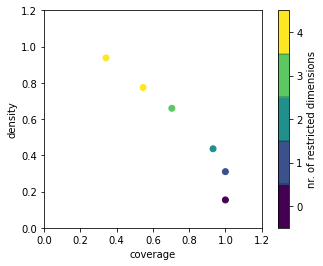

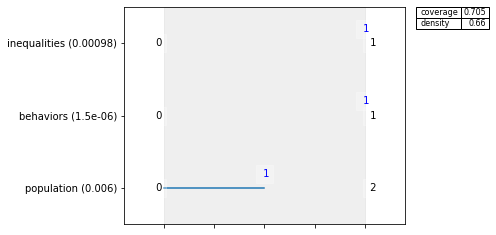

alt.VConcatChart(...)

In [4]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
import matplotlib.pyplot as plt

x = df_rozenberg.iloc[:,0:7] 
y = df_rozenberg.iloc[:,7].values >=1

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(3))
box1.inspect(3)
box1.inspect(3, style='graph')

plt.show()
box1.inspect_tradeoff()

# SSP2

                 reproduce coverage  reproduce density
behaviors                      70.0               90.0
convergence                    70.0               60.0
inequalities                   50.0               50.0
population                     40.0               80.0
technologies                   20.0                0.0
capital markets                10.0               20.0
fossils                        10.0               10.0
coverage    0.464286
density      0.40625
id                 4
mass        0.111888
mean         0.40625
res_dim            4
Name: 4, dtype: object

             box 4                                   
               min  max                     qp values
behaviors      0.0  0.0  [-1.0, 0.007952250065964422]
convergence    0.0  1.0   [-1.0, 0.06752777747436578]
population     0.0  1.0   [-1.0, 0.06752777747436578]
inequalities   1.0  1.0   [0.02290405000582007, -1.0]



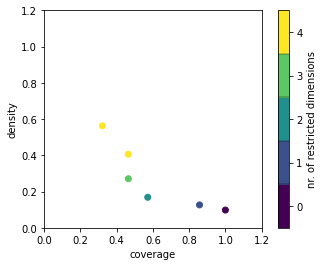

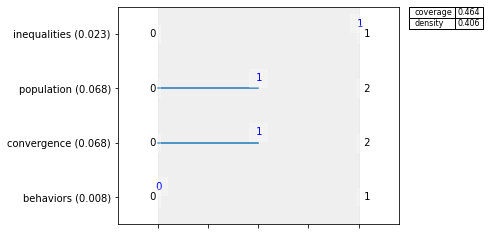

alt.VConcatChart(...)

In [5]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
import matplotlib.pyplot as plt

x = df_rozenberg.iloc[:,0:7] 
y = df_rozenberg.iloc[:,8].values >=1

prim_alg = prim.Prim(x, y, threshold=0.55, peel_alpha=0.05)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(4))
box1.inspect(4)
box1.inspect(4, style='graph')

plt.show()
box1.inspect_tradeoff()

# SSP3

                 reproduce coverage  reproduce density
behaviors                     100.0              100.0
inequalities                   70.0               70.0
population                     60.0              100.0
technologies                   30.0               30.0
convergence                     0.0                0.0
fossils                         0.0                0.0
capital markets                 0.0                0.0
coverage         0.8
density     0.666667
id                 3
mass        0.167832
mean        0.666667
res_dim            3
Name: 3, dtype: object

             box 3                                     
               min  max                       qp values
behaviors      0.0  0.0   [-1.0, 3.130396509639097e-06]
inequalities   0.0  0.0  [-1.0, 0.00023925686322256464]
population     1.0  2.0    [0.002914918307607955, -1.0]



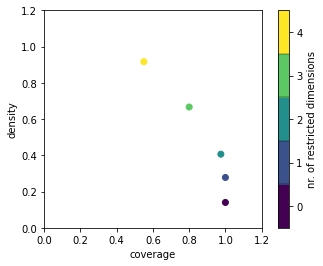

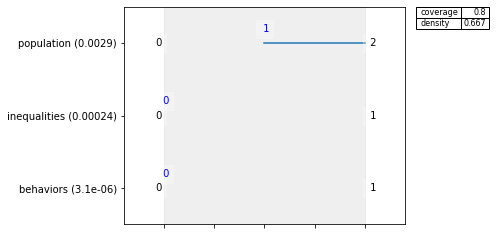

alt.VConcatChart(...)

In [6]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
import matplotlib.pyplot as plt

x = df_rozenberg.iloc[:,0:7] 
y = df_rozenberg.iloc[:,9].values >=1

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(3))
box1.inspect(3)
box1.inspect(3, style='graph')

plt.show()
box1.inspect_tradeoff()

# SSP4

                 reproduce coverage  reproduce density
behaviors                      70.0              100.0
inequalities                   60.0              100.0
convergence                    20.0              100.0
population                      0.0                0.0
technologies                    0.0                0.0
fossils                         0.0                0.0
capital markets                 0.0                0.0
coverage     0.913043
density         0.875
id                  4
mass        0.0839161
mean            0.875
res_dim             3
Name: 4, dtype: object

             box 4                                     
               min  max                       qp values
convergence    0.0  0.0  [-1.0, 5.8154822275538926e-09]
inequalities   0.0  0.0  [-1.0, 1.1582287777091569e-05]
behaviors      1.0  1.0   [6.336598320679067e-05, -1.0]



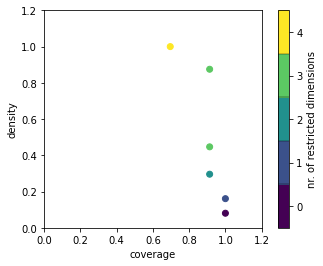

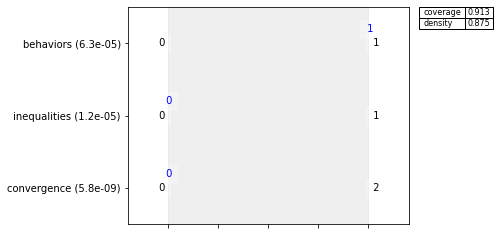

alt.VConcatChart(...)

In [7]:

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
import matplotlib.pyplot as plt

x = df_rozenberg.iloc[:,0:7] 
y = df_rozenberg.iloc[:,10].values >=1

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(4))
box1.inspect(4)
box1.inspect(4, style='graph')

plt.show()
box1.inspect_tradeoff()

# SSP5

                 reproduce coverage  reproduce density
convergence                    90.0               90.0
inequalities                   80.0               80.0
capital markets                60.0               50.0
behaviors                      10.0                0.0
population                      0.0                0.0
technologies                    0.0                0.0
fossils                         0.0                0.0
coverage    0.736842
density     0.291667
id                 3
mass        0.167832
mean        0.291667
res_dim            2
Name: 3, dtype: object

             box 3                                    
               min  max                      qp values
convergence    2.0  2.0  [0.0005685305576793595, -1.0]
inequalities   1.0  1.0     [0.0350590656942195, -1.0]



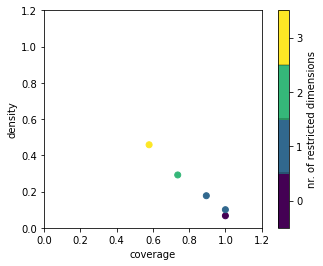

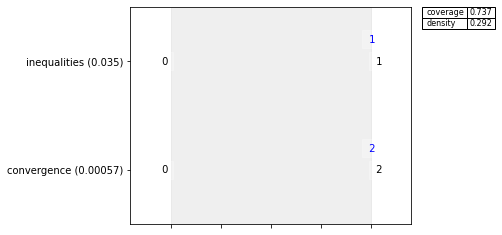

alt.VConcatChart(...)

In [8]:
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
import matplotlib.pyplot as plt

x = df_rozenberg.iloc[:,0:7] 
y = df_rozenberg.iloc[:,11].values>=1

prim_alg = prim.Prim(x, y, threshold=0.45, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
print(box1.resample(3))
box1.inspect(3)
box1.inspect(3, style='graph')

plt.show()
box1.inspect_tradeoff()

In [9]:
box1.peeling_trajectory


,coverage,density,id,mass,mean,res_dim
0,1.000000,0.066434,0,1.000000,0.066434,0
1,1.000000,0.100000,1,0.664336,0.100000,1
2,0.894737,0.177083,2,0.335664,0.177083,1
3,0.736842,0.291667,3,0.167832,0.291667,2
4,0.578947,0.458333,4,0.083916,0.458333,3


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


coverage    0.998852
density     0.202986
id                 3
mass          0.8572
mean        0.202986
res_dim            1
Name: 3, dtype: object

         box 3                                         
           min       max                      qp values
r_33 -3.377941  1.035241  [-1.0, 6.072560071773518e-07]



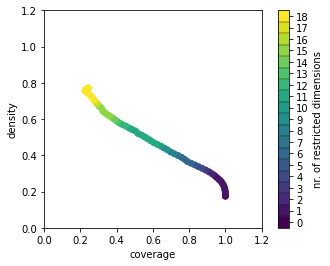

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim
from ema_workbench import load_results

fn = r'./data/Hamarat et al 2013.gz'

# specify x 
x, outcomes = load_results(fn)

# PRIM struggles to analyze the data due to its format. 
# So in this assignment we manually remove categorical variables so that the database can be worked with
# Then the PCA preprocessing is used to perform a rotation on the data so that PRIM can be used 

# Create new x dropping the two last columns 
x_new = x.iloc[:,-2]
# Create new x by excluding the categorical type
x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)

# specify y with the ones of interest
y = outcomes['fraction renewables'][:, -1] < outcomes['fraction renewables'][:, 0]

#
rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, y)

# perform prim on modified results tuple
prim_obj = prim.Prim(rotated_experiments, y, threshold=0.1)
box = prim_obj.find_box()

box.show_tradeoff()
box.inspect(3)
plt.show()
